<center><h1 style="font-family: 'Georgia'; color: #f2f2f2; background-color:#800040; padding: 20px;">Income Clustering
    </h1></center>

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
Income clustering by age.
</p>

<p style="font-family: 'Georgia'; font-size: 14px; font-weight: 500; color: #800040;">
dataset link: https://github.com/codebasics/py/blob/master/ML/13_kmeans/income.csv
</p>

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# LOAD DATASET
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
# EXAMINE DATASET
df.shape

(22, 3)

In [5]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [6]:
df.dtypes

Name         object
Age           int64
Income($)     int64
dtype: object

In [37]:
# CHECK NULL VALUES
df.isnull().sum()

Age          0
Income($)    0
dtype: int64

In [9]:
# DROP IRRELEVANT COLUMNS
df.drop(columns=['Name'], axis=1, inplace=True)
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


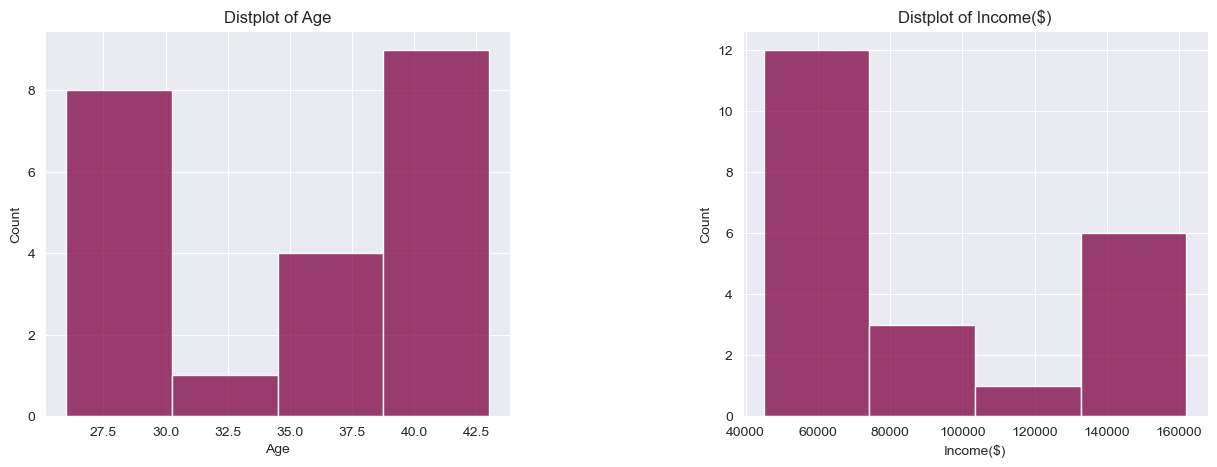

In [18]:
# VISUALIZE HOW DATA IS DISTRIBUTED FOR EACH COLUMN
plt.figure(1, figsize=(15, 5))
n = 1

for col in df.columns:
    plt.subplot(1, 2, n)                   #subplot(num_rows, num_columns, index(starting_at_position_1))
    plt.subplots_adjust(hspace=0.5, wspace=0.5) #adds styling
    sns.histplot(df[col], bins=4, color='#800040')           #seaborn histogram, formerly the distplot()
    plt.title('Distplot of {}'.format(col))  #assign current value of x to the plot
    n += 1

plt.show()

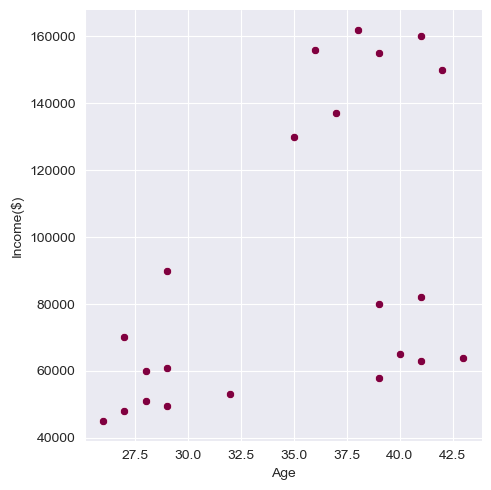

In [23]:
# VISUALIZE THE DATA POINTS OF AGE VS INCOME
sns.relplot(x='Age', y='Income($)', data=df, color='#800040')
# this also works
# plt.scatter(x=df['Age'], y=df['Income($)'], color='#800040')

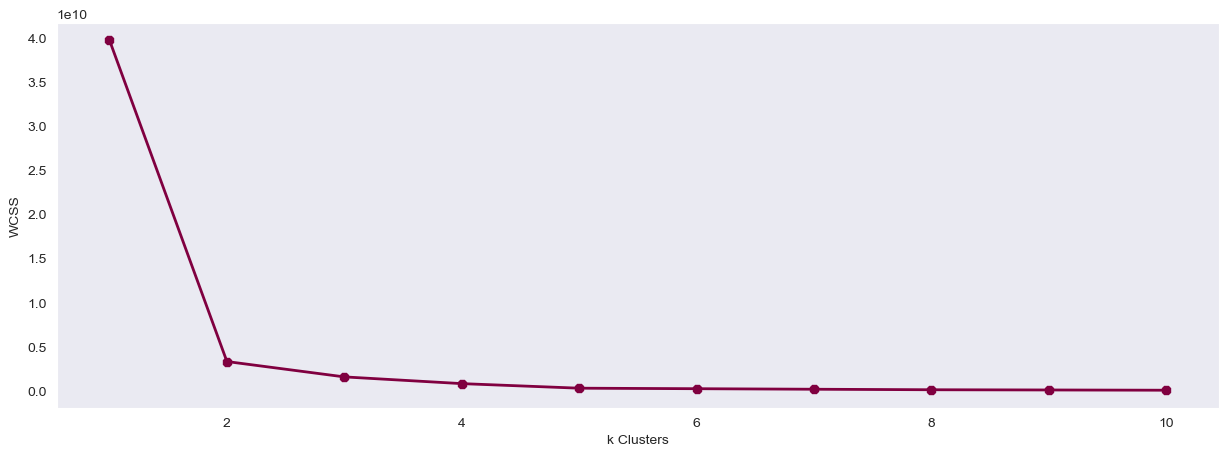

In [33]:
# ELBOW METHOD
from sklearn.cluster import KMeans
import warnings                          #ignoring warnings
warnings.filterwarnings("ignore")

X1 = df.copy().values  #create a new dataframe then extract just the values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.figure(2, figsize=(15,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='#800040', marker='8')
plt.xlabel('k Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# MAKING PREDICTIONS
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(X1)
print(label)

[0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [35]:
# PRINTING CLUSTER CENTROID LOCATIONS
print(kmeans.cluster_centers_)

[[3.32000000e+01 6.26333333e+04]
 [3.82857143e+01 1.50000000e+05]]


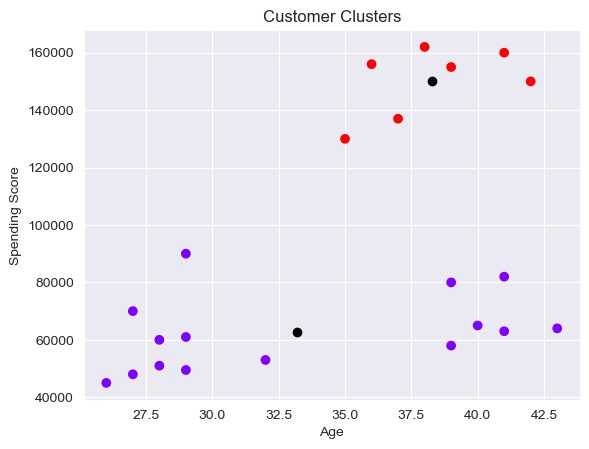

In [36]:
# PLOTTING THE CLUSTERS
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, cmap='rainbow') #plt.scatter need the .values, not the dataframe so in the X1 variable, you need to specify that you need df.copy().values and not just df.copy
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')

plt.title("Customer Clusters")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()